# Mini Project: ML - Predictive Model Development and Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import torch
from torch import optim
import torch.nn as nn

## Import data

In [2]:
df = pd.read_csv("data/diabetes_dataset.csv")

In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


## Explore data

In [4]:
df.shape

(100000, 16)

In [5]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
for column in df.columns:
    print(column+":")
    print(df[column].unique())

year:
[2020 2015 2016 2019 2018 2021 2022]
gender:
['Female' 'Male' 'Other']
age:
[32.   29.   18.   41.   52.   66.   49.   15.   51.   42.   53.    3.
 40.   64.   23.    2.   80.   12.   50.   69.   75.   72.   46.   47.
 14.   24.   55.   13.   31.   38.   67.   61.   79.    8.   11.   71.
 25.    5.    6.   28.    4.   54.   43.   65.    7.   48.    1.32 63.
 59.   39.   19.   62.   45.   44.   73.   10.   26.   22.   68.   57.
  0.8  60.   30.   58.   77.   56.   37.   20.   21.    9.   36.   35.
  1.   17.   78.   16.    0.48 27.   70.    0.64  1.56  1.72 74.    1.16
 33.   34.   76.    1.08  0.16  1.24  0.08  0.72  0.32  0.24  0.4   1.64
  1.88  1.4   1.48  0.56  0.88  1.8 ]
location:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Miss

In [7]:
df.dtypes

year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

In [8]:
df.isna().any()

year                    False
gender                  False
age                     False
location                False
race:AfricanAmerican    False
race:Asian              False
race:Caucasian          False
race:Hispanic           False
race:Other              False
hypertension            False
heart_disease           False
smoking_history         False
bmi                     False
hbA1c_level             False
blood_glucose_level     False
diabetes                False
dtype: bool

In [9]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Data cleaning & Feature Engineering

### Numerical variables
- Evaluate the level of collinearity of the data

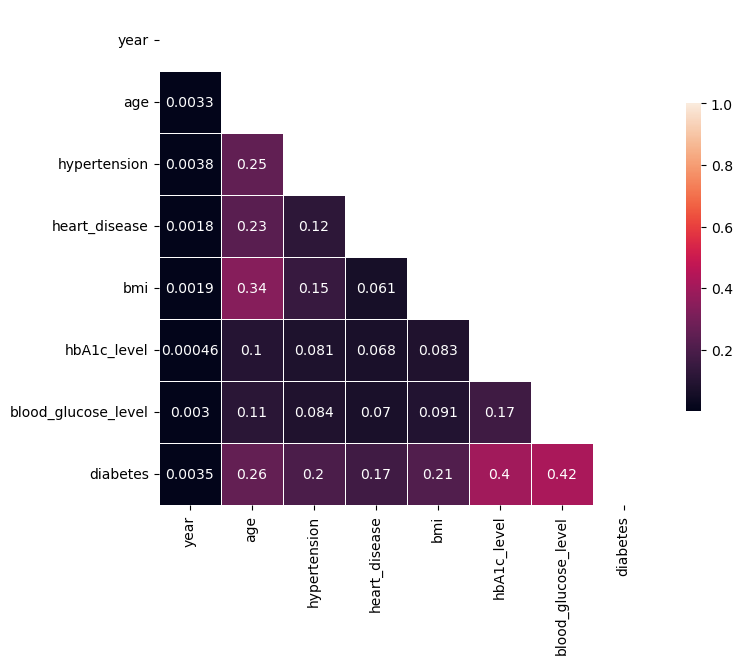

In [10]:
dfnum = df.select_dtypes('number').drop(columns=[
    'race:AfricanAmerican', 
    'race:Asian', 
    'race:Caucasian', 
    'race:Hispanic', 
    'race:Other'])

corr=np.abs(dfnum.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Categorical variables

In [11]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [12]:
df = df[(df['gender']=="Female") | (df['gender']=="Male")]

In [13]:
gender_dummies = pd.get_dummies(df['gender'], drop_first=True, dtype=int)
df= pd.concat([df.drop(columns=['gender']), gender_dummies], axis=1)

In [14]:
smoking_dummies = pd.get_dummies(df['smoking_history'], dtype=int, prefix="smoking_history")
df= pd.concat([df.drop(columns=['smoking_history']), smoking_dummies], axis=1)

In [15]:
df.drop(columns=['location'], inplace=True)

In [16]:
df

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2020,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,0,0,0,0,0,1,0
1,2015,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,0,0,0,0,0,1,0
2,2015,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,1,0,0,0,0,1,0
3,2015,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,1,0,0,0,0,1,0
4,2016,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,33.0,0,0,0,0,1,0,0,21.21,6.5,90,0,0,0,0,0,0,1,0
99996,2016,80.0,0,1,0,0,0,0,0,36.66,5.7,100,0,0,1,0,0,0,0,0
99997,2018,46.0,0,1,0,0,0,0,0,36.12,6.2,158,0,1,0,0,1,0,0,0
99998,2018,51.0,1,0,0,0,0,0,0,29.29,6.0,155,0,0,0,0,0,0,0,1


## Training and testing Machine Learning models

Our target variable, "diabetes", is a binary label:
- 0 means the patient does not has diabetes, and
- 1 means the patiend has diabetes,

therefore, we will use **classifier models**.

### Divide training and test groups
Including training and test groups with the original data and scaled data, so both can be tested on the models.

In [17]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [20]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### K-Nearest Neighbors

#### Original data

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
random_patient = X_test.sample()
random_patient

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
97562,2019,79.0,0,1,0,0,0,0,0,27.02,4.0,159,1,0,0,0,1,0,0


In [26]:
y_test.loc[63706]

np.int64(0)

In [27]:
knn.predict(random_patient)

array([0])

In [28]:
knn.score(X_test, y_test)

0.9531429714457168

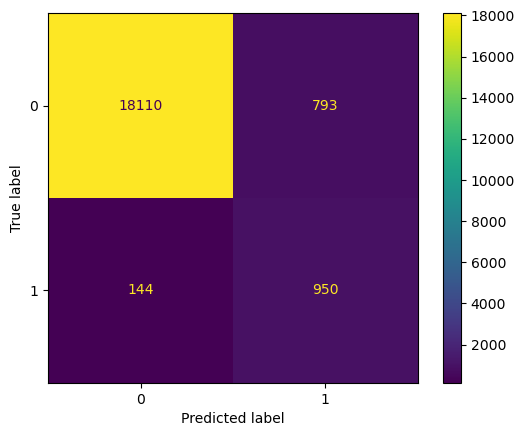

In [29]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Scaled data

In [30]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)

In [31]:
knn_scaled.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
random_patient = X_test.sample()
random_patient_scaled = scaler.transform(random_patient)
random_patient

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
34544,2019,48.0,0,0,1,0,0,0,1,31.26,6.1,200,1,0,0,0,1,0,0


In [33]:
y_test.loc[70478]

np.int64(0)

In [34]:
knn_scaled.predict(random_patient_scaled)

array([0])

In [35]:
knn_scaled.score(X_test_scaled, y_test)

0.952892933940091

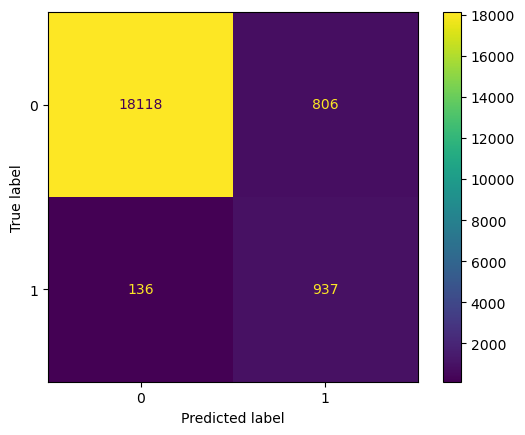

In [36]:
y_pred = knn_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### Decision Tree

#### Original data

In [37]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


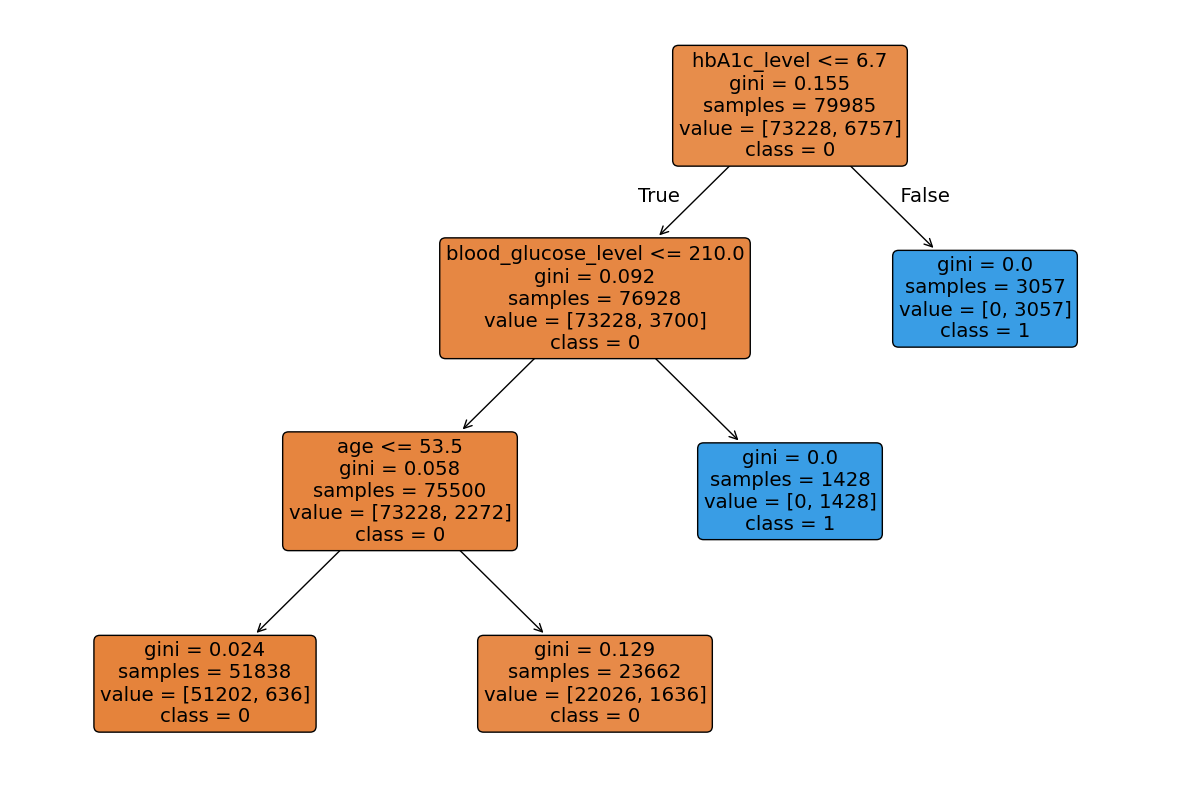

In [38]:
plt.figure(figsize=(12,8))
plot_tree(
    dt,
    feature_names = X_train.columns,
    class_names=[str(c) for c in y_train.unique()],
    filled=True,
    rounded=True,
    impurity=True,
)
plt.tight_layout()
plt.show()

In [39]:
random_patient = X_test.sample()
random_patient

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
86345,2019,5.0,0,1,0,0,0,0,0,26.43,6.2,126,1,1,0,0,0,0,0


In [40]:
y_test.loc[33668]

np.int64(0)

In [41]:
dt.predict(random_patient)

array([0])

In [42]:
dt.score(X_test, y_test)

0.9729459418912837

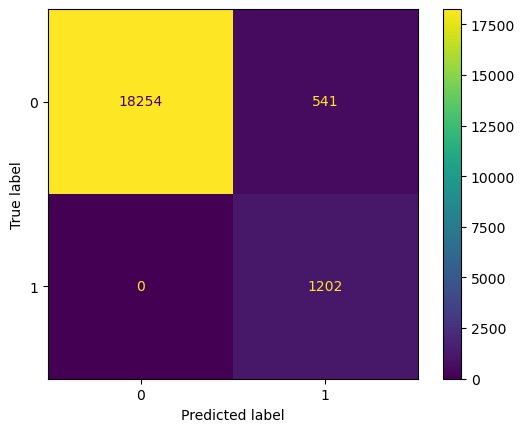

In [43]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Logistic Regression

### Original data

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/anaconda3/envs/torchfix/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
random_patient = X_test.sample()
random_patient

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
95041,2019,53.0,0,0,0,1,0,0,0,29.64,3.5,155,1,0,0,0,0,1,0


In [46]:
y_test.loc[68229]

np.int64(0)

In [47]:
lr.predict(random_patient)

array([0])

In [48]:
lr.score(X_test, y_test)

0.9619942991448718

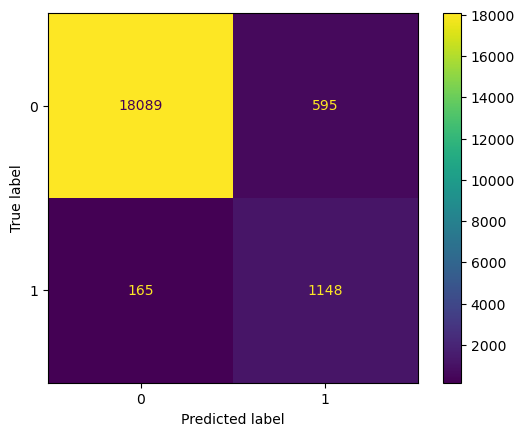

In [49]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### Scaled data

In [50]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [51]:
random_patient = X_test.sample()
random_patient_scaled = scaler.transform(random_patient)
random_patient

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
21219,2019,24.0,0,0,0,0,1,0,0,22.86,6.6,100,0,1,0,0,0,0,0


In [52]:
y_test.loc[873]

np.int64(0)

In [53]:
lr_scaled.predict(random_patient_scaled)

array([0])

In [54]:
lr_scaled.score(X_test_scaled, y_test)

0.9619442916437465

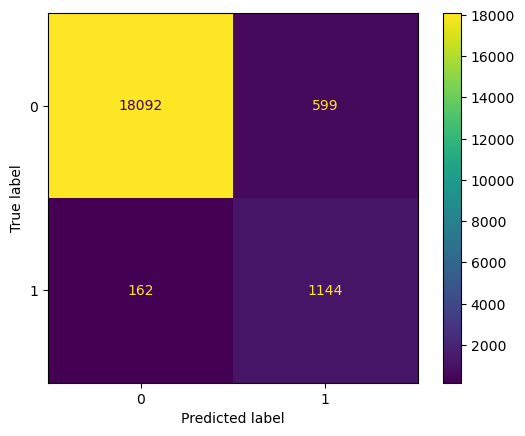

In [55]:
y_pred = lr_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Results:
- K-Nearest Neighbors:
    - With original data:
        - Accuracy score: 0.95
        - True positives / negatives: 950 / 18110
        - False positives / negatives: 793 / 144
    - With scaled data:
        - Accuracy score: 0.95
        - True positives / negatives: 937 / 18118
        - False positives / negatives: 806 / 136
- Decision Tree:
    - With original data:
        - Accuracy score: 0.97
        - True positives / negatives: 1202 / 18254
        - False positives / negatives: 541 / 0
    - No need to test scaled data, as decision tree gives the same result with original or scaled data.
- Logistic Regression:
    - With original data:
        - Accuracy score: 0.96
        - True positives / negatives: 1137 / 18083
        - False positives / negatives: 606 / 171
    - With scaled data:
        - Accuracy score: 0.96
        - True positives / negatives: 1144 / 18092
        - False positives / negatives: 599 / 162

## Neural Network

In [21]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [22]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1,1)

In [24]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size,hidden_size1),
                                     nn.ReLU(),
                                     nn.Linear(hidden_size1,hidden_size2),
                                     nn.ReLU(),
                                    nn.Linear(hidden_size2,output_size),
                                    nn.Sigmoid())
    def forward(self, x):
        return self.network(x)

In [25]:
X_train_tensor.shape

torch.Size([79985, 19])

In [26]:
input_size = 19
hidden_size1 = 32
hidden_size2 = 16
output_size = 1

model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

In [32]:
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 1500
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/1500], Loss: 0.1124
Epoch [100/1500], Loss: 0.1123
Epoch [150/1500], Loss: 0.1122
Epoch [200/1500], Loss: 0.1121
Epoch [250/1500], Loss: 0.1119
Epoch [300/1500], Loss: 0.1118
Epoch [350/1500], Loss: 0.1117
Epoch [400/1500], Loss: 0.1116
Epoch [450/1500], Loss: 0.1115
Epoch [500/1500], Loss: 0.1115
Epoch [550/1500], Loss: 0.1114
Epoch [600/1500], Loss: 0.1112
Epoch [650/1500], Loss: 0.1110
Epoch [700/1500], Loss: 0.1104
Epoch [750/1500], Loss: 0.1099
Epoch [800/1500], Loss: 0.1097
Epoch [850/1500], Loss: 0.1095
Epoch [900/1500], Loss: 0.1093
Epoch [950/1500], Loss: 0.1088
Epoch [1000/1500], Loss: 0.1083
Epoch [1050/1500], Loss: 0.1077
Epoch [1100/1500], Loss: 0.1070
Epoch [1150/1500], Loss: 0.1064
Epoch [1200/1500], Loss: 0.1058
Epoch [1250/1500], Loss: 0.1052
Epoch [1300/1500], Loss: 0.1046
Epoch [1350/1500], Loss: 0.1042
Epoch [1400/1500], Loss: 0.1037
Epoch [1450/1500], Loss: 0.1032
Epoch [1500/1500], Loss: 0.1028


Test Loss: 0.1037


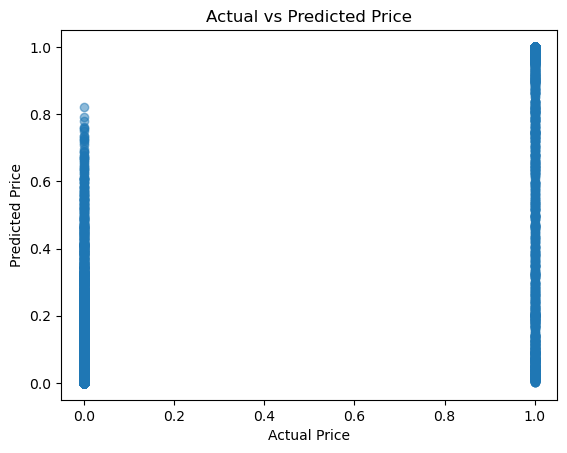

In [33]:
model.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [34]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = (model(X_test_tensor) > 0.5).int().numpy()
    actuals = y_test_tensor.numpy()

accuracy = accuracy_score(actuals, predictions)
print(f'accuracy score: {accuracy:.4f}')

accuracy score: 0.9656


In [35]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = (model(X_test_tensor) > 0.5).int().numpy()
    actuals = y_test_tensor.numpy()

accuracy = recall_score(actuals, predictions)
print(f'recall score: {accuracy:.4f}')

recall score: 0.6718
